# Taller atributos y operaciones especiales 
A continuación, se mostrará el taller sobre operaciones espaciales a partir de los datos de usuarios asignados del régimen contributivo de la Subred Sur de la ciudad de Bogotá, las localidades de la ciudad y las unidades de salud de la entidad descrita 


In [5]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [15]:
#Se utilizarán los datos del proyecto final de la materia, es decir datos de usuarios asignados a la Subred Sur, unidades de salud de la entidad y el shapefile del territorio 
# Definir la ruta donde se encuentran los datos
ruta_trabajo = r"C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG"

In [19]:
os.chdir(ruta_trabajo)

In [21]:
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG


In [25]:
#Subir archivo csv de usuarios asignados
usuarios_asignados = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv'

In [27]:
# Cargar el archivo CSV
df = pd.read_csv(usuarios_asignados)

In [29]:
# Verificar las primeras filas para confirmar que se leyeron correctamente
df.head()

,ID,DIRECCION,CIUDAD,X,Y
0,1,CL 80C S 17C 23,BOGOTA,-74.141770,4.535430
1,2,KR 45 C 72 35 SUR,BOGOTA,-74.162464,4.571049
2,3,CR 8 C 75 C 37,BOGOTA,0.000000,0.000000
3,4,KR 13 ESTE 74 B 31 SUR,BOGOTA,-74.093760,4.516314
4,5,CL 65 SUR 6 A 11,BOGOTA,-74.112087,4.533924


In [31]:
# Crear una geometría de puntos a partir de las columnas 'X' y 'Y'
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

In [67]:
# Crear un GeoDataFrame
Usuarios_contributivo = gpd.GeoDataFrame(df, geometry=geometry)

In [69]:
# Verificar las primeras filas del GeoDataFrame
Usuarios_contributivo.head()

,ID,DIRECCION,CIUDAD,X,Y,geometry
0,1,CL 80C S 17C 23,BOGOTA,-74.141770,4.535430,POINT (-74.14177 4.53543)
1,2,KR 45 C 72 35 SUR,BOGOTA,-74.162464,4.571049,POINT (-74.16246 4.57105)
2,3,CR 8 C 75 C 37,BOGOTA,0.000000,0.000000,POINT (0 0)
3,4,KR 13 ESTE 74 B 31 SUR,BOGOTA,-74.093760,4.516314,POINT (-74.09376 4.51631)
4,5,CL 65 SUR 6 A 11,BOGOTA,-74.112087,4.533924,POINT (-74.11209 4.53392)


In [73]:
# Asignar el CRS adecuado
Usuarios_contributivo.set_crs('EPSG:4326', allow_override=True, inplace=True)


,ID,DIRECCION,CIUDAD,X,Y,geometry
0,1,CL 80C S 17C 23,BOGOTA,-74.141770,4.535430,POINT (-74.14177 4.53543)
1,2,KR 45 C 72 35 SUR,BOGOTA,-74.162464,4.571049,POINT (-74.16246 4.57105)
2,3,CR 8 C 75 C 37,BOGOTA,0.000000,0.000000,POINT (0 0)
3,4,KR 13 ESTE 74 B 31 SUR,BOGOTA,-74.093760,4.516314,POINT (-74.09376 4.51631)
4,5,CL 65 SUR 6 A 11,BOGOTA,-74.112087,4.533924,POINT (-74.11209 4.53392)
...,...,...,...,...,...,...
14136,14137,CL 76 SUR 17 A 26,BOGOTA,-74.138318,4.541336,POINT (-74.13832 4.54134)
14137,14138,TV 73 C 70 57 SUR,BOGOTA,-74.167449,4.578729,POINT (-74.16745 4.57873)
14138,14139,CR 15 ESTE N 62 30 SUR,BOGOTA,-74.086293,4.527648,POINT (-74.08629 4.52765)
14139,14140,CR 4 110 C SUR 30,BOGOTA,0.000000,0.000000,POINT (0 0)


In [75]:
# Verificar el CRS asignado
print(gdf.crs)

EPSG:4326


In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt



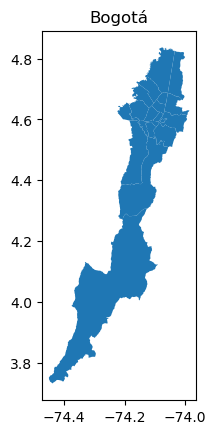

In [61]:
#Ahora se incluye el shapefile de la ciudad de Bogota

# Ruta al shapefile
Bogota_territorio = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Taller_Operaciones_Espaciales\Loca.shp'

# Cargar el shapefile
shapefile = gpd.read_file(Bogota_territorio)

# Mostrar el shapefile en el mapa
shapefile.plot()

# Agregar título al gráfico
plt.title('Bogotá')

# Mostrar el gráfico
plt.show()






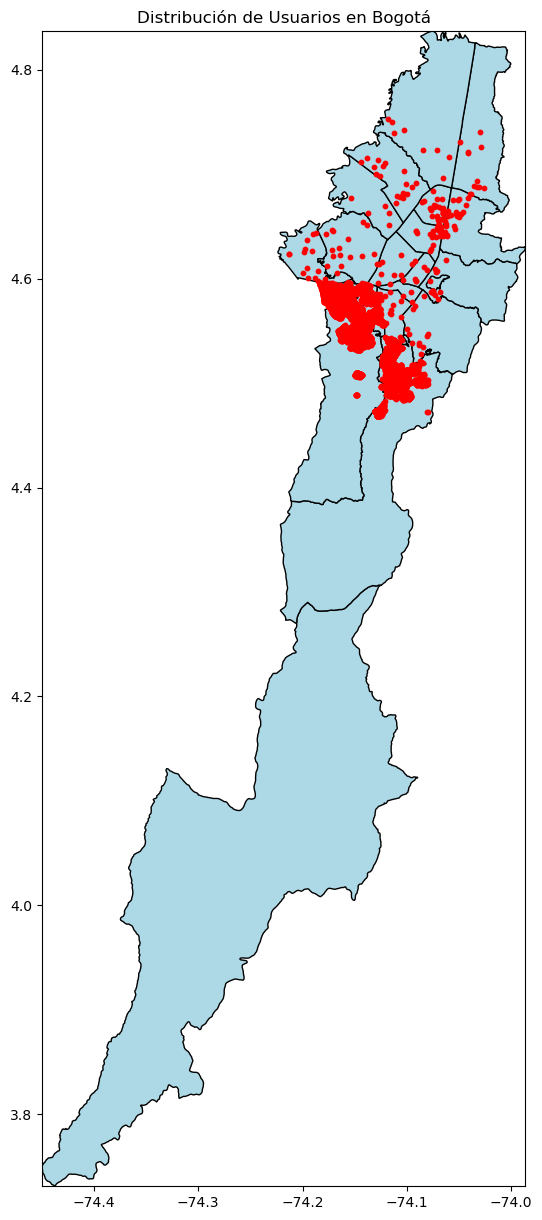

In [79]:
#Ubicacion de los usuarios asignados del regimen contributivo de diciembre en la ciudad de Bogotá
# Crear el mapa base de Bogotá
fig, ax = plt.subplots(figsize=(15, 15))  
# Dibujar el shapefile de Bogotá
shapefile.plot(ax=ax, color='lightblue', edgecolor='black')

# Agregar los usuarios en el mismo mapa, aumentando el tamaño de los puntos
Usuarios_contributivo.plot(ax=ax, marker='o', color='red', markersize=10)  

# Ajustar límites del mapa para centrar Bogotá
ax.set_xlim(shapefile.total_bounds[[0, 2]])  
ax.set_ylim(shapefile.total_bounds[[1, 3]])  

# Título del gráfico
ax.set_title('Distribución de Usuarios en Bogotá')

# Mostrar el gráfico
plt.show()


In [81]:
#Ahora se incluyen las unidades de salud 
# Ruta del archivo CSV
csv_path = r"C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD_modificado.csv"

# Leer el archivo CSV
unidades_de_salud = pd.read_csv(csv_path)

# Mostrar las primeras filas para verificar las columnas
print(unidades_de_salud.head())

# Crear una columna de geometría a partir de las columnas X e Y
geometry = [Point(xy) for xy in zip(unidades_de_salud['X'], unidades_de_salud['Y'])]

# Convertir a un GeoDataFrame
unidades_de_salud_gdf = gpd.GeoDataFrame(unidades_de_salud, geometry=geometry)

# Mostrar el GeoDataFrame
print(unidades_de_salud_gdf.head())

   FID Shape *  ID                     NOMBRE_DE  \
0    0   Point   1                         TUNAL   
1    1   Point   2                       MEISSEN   
2    2   Point   3  EL CARMEN - MATERNO INFANTIL   
3    3   Point   5                    SAN BENITO   
4    4   Point   8             MANUELA BELTRÁN I   

                          NOMBRE_ACT               TIPOLOGIA  \
0                  HOSPITAL EL TUNAL                HOSPITAL   
1                   HOSPITAL MEISSEN                HOSPITAL   
2  CENTRO DE SALUD EL CARMEN MATERNO  CENTRO DE SALUD TIPO 2   
3         CENTRO DE SALUD SAN BENITO  CENTRO DE SALUD TIPO 2   
4    CENTRO DE SALUD MANUELA BELTRAN  CENTRO DE SALUD TIPO 1   

                   DIRECCION       LOCALIDAD  NOMBRE_UPZ  UPZ          X  \
0           KR 20 47B 35 SUR      TUNJUELITO     VENECIA   42 -74.128232   
1  Cra. 60G No. 18A - 09 Sur  CIUDAD BOLÍVAR      LUCERO   67 -74.138703   
2    CL 48 B SUR No. 28 - 80      TUNJUELITO     VENECIA   42 -74.131871  

In [85]:
# Asignar CRS 
unidades_de_salud_gdf.crs = "EPSG:4326"

# Verificar el CRS
print(unidades_de_salud_gdf.crs)


EPSG:4326


In [87]:
# Asignar CRS 
unidades_de_salud_gdf.crs = "EPSG:4326"

# Verificar el CRS
print(unidades_de_salud_gdf.crs)


EPSG:4326


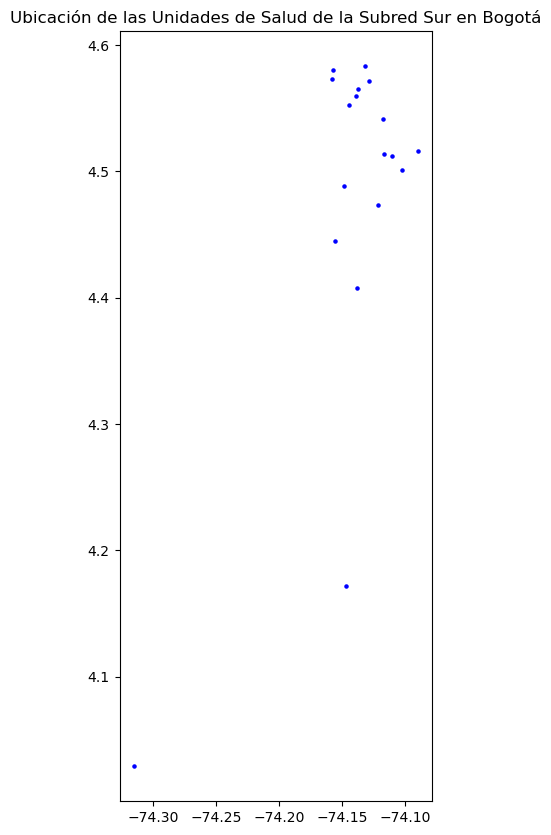

In [90]:
# Crear un gráfico de las unidades de salud
fig, ax = plt.subplots(figsize=(10, 10))

# Visualizar las unidades de salud
unidades_de_salud_gdf.plot(ax=ax, marker='o', color='blue', markersize=5)

# Título del gráfico
ax.set_title('Ubicación de las Unidades de Salud de la Subred Sur en Bogotá')

# Mostrar el gráfico
plt.show()

In [122]:
# Verificar el CRS de ambos GeoDataFrames
print("CRS de los usuarios:", Usuarios_contributivo.crs)
print("CRS de Bogotá:", shapefile.crs)

# Si no coinciden, re-proyectamos el GeoDataFrame de los usuarios al CRS de Bogotá
if Usuarios_contributivo.crs != shapefile.crs:
    Usuarios_contributivo = Usuarios_contributivo.to_crs(shapefile.crs)

# Filtrar las localidades de interés (Tunjuelito, Sumapaz, Usme, y Ciudad Bolívar)
localidades_interes = ['Tunjuelito', 'Sumapaz', 'Usme', 'Ciudad Bolívar']
localidades_filtradas = shapefile[shapefile['LocNombre'].isin(localidades_interes)]

# Realizar el 'spatial join' para contar cuántos usuarios están en cada localidad
usuarios_en_localidades = gpd.sjoin(Usuarios_contributivo, localidades_filtradas, how='inner', predicate='within')

# Contar los usuarios por localidad
conteo_usuarios_por_localidad = usuarios_en_localidades['LocNombre'].value_counts()

# Mostrar el resultado
print(conteo_usuarios_por_localidad)




CRS de los usuarios: EPSG:4686
CRS de Bogotá: EPSG:4686
Series([], Name: count, dtype: int64)


In [124]:
# Ruta al shapefile
Bogota_territorio_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Taller_Operaciones_Espaciales\Loca.shp'

# Cargar el shapefile
shapefile = gpd.read_file(Bogota_territorio_path)

# Ver las primeras filas del GeoDataFrame
print(shapefile.head())



            LocNombre           LocAAdmini       LocArea LocCodigo  \
0      ANTONIO NARIÑO  Acuerdo 117 de 2003  4.879543e+06        15   
1          TUNJUELITO  Acuerdo 117 de 2003  9.910940e+06        06   
2  RAFAEL URIBE URIBE  Acuerdo 117 de 2003  1.383408e+07        18   
3          CANDELARIA  Acuerdo 117 de 2003  2.060243e+06        17   
4      BARRIOS UNIDOS    Acuerdo 8 de 1977  1.190345e+07        12   

   SHAPE_Leng  SHAPE_Area                                           geometry  
0    0.108973    0.000397  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
1    0.210542    0.000807  POLYGON ((-74.13777 4.59489, -74.13165 4.59363...  
2    0.174513    0.001126  POLYGON ((-74.12803 4.59254, -74.12777 4.59233...  
3    0.067158    0.000168  POLYGON ((-74.06621 4.60317, -74.0662 4.60317,...  
4    0.121180    0.000969  POLYGON ((-74.05725 4.68684, -74.06249 4.65594...  


In [128]:
#Se hara un spatial join entre los usuarios asignados y el shape de localidades de Bogotá para ver la cantidad de usuarios en el territorio
# Ruta al shapefile de Bogotá
Bogota_territorio = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Taller_Operaciones_Espaciales\Loca.shp'

# Cargar el shapefile
shapefile = gpd.read_file(Bogota_territorio)

# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas
# Convertir el CRS del shapefile de Bogotá para que coincida con el CRS de los usuarios
shapefile = shapefile.to_crs(Usuarios_contributivo.crs)

# Realizar la unión espacial
usuarios_en_localidades = gpd.sjoin(Usuarios_contributivo, shapefile, how='inner', predicate='within')

# Contar cuántos usuarios están en cada localidad
usuarios_por_localidad = usuarios_en_localidades['LocNombre'].value_counts()

# Mostrar el resultado
print(usuarios_por_localidad)



LocNombre
CIUDAD BOLIVAR        6198
USME                  4148
TUNJUELITO            1314
BARRIOS UNIDOS          29
CHAPINERO               23
RAFAEL URIBE URIBE      23
ENGATIVA                19
TEUSAQUILLO             19
KENNEDY                 18
BOSA                    15
SAN CRISTOBAL           14
SANTA FE                12
USAQUEN                 12
PUENTE ARANDA            9
SUBA                     8
LOS MARTIRES             6
FONTIBON                 5
ANTONIO NARIÑO           4
CANDELARIA               1
Name: count, dtype: int64


In [136]:
# Ahora se realizará un mapa de los usuarios asignados por localidad 
# Unir los conteos de usuarios con el shapefile de Bogotá
shapefile['usuarios_count'] = shapefile['LocNombre'].map(usuarios_por_localidad)

# Verificar si la columna 'usuarios_count' se añadió correctamente
print(shapefile[['LocNombre', 'usuarios_count']].head())


            LocNombre  usuarios_count
0      ANTONIO NARIÑO             4.0
1          TUNJUELITO          1314.0
2  RAFAEL URIBE URIBE            23.0
3          CANDELARIA             1.0
4      BARRIOS UNIDOS            29.0


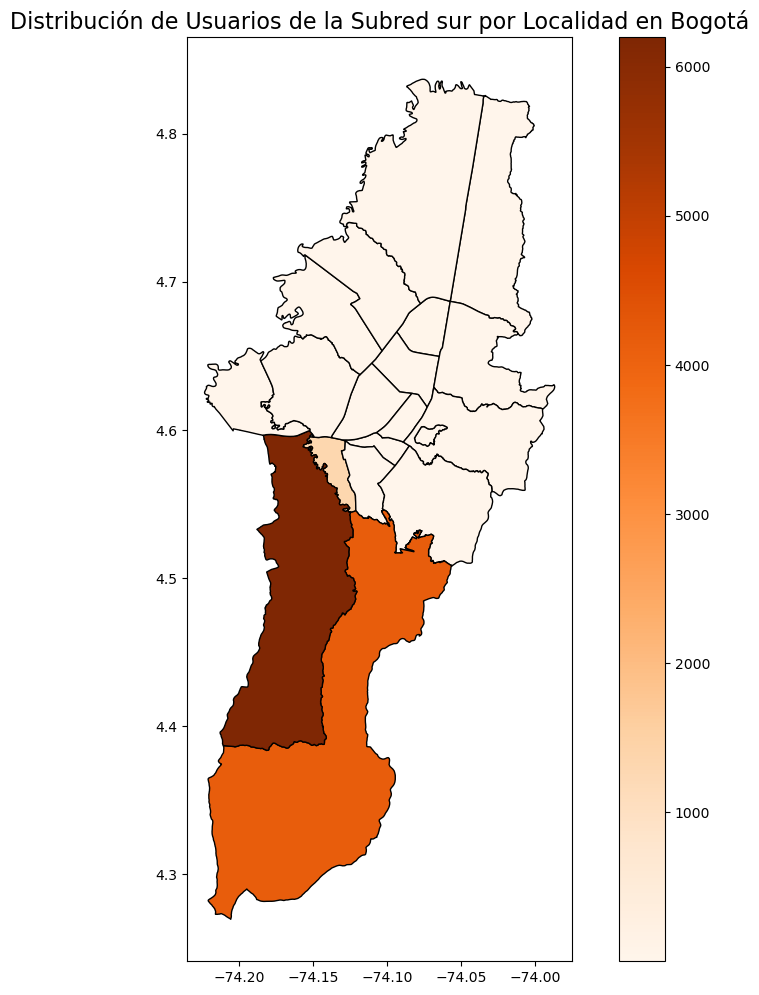

In [140]:
# Visualizar el mapa de usuarios por localidad
fig, ax = plt.subplots(figsize=(12, 12))

# Crear el mapa, coloreando por el número de usuarios
shapefile.plot(ax=ax, column='usuarios_count', cmap='Oranges', legend=True, edgecolor='black')

# Agregar título y mejorar la visualización
ax.set_title('Distribución de Usuarios de la Subred Sur por Localidad en Bogotá', fontsize=16)

# Mostrar el mapa
plt.show()


In [207]:
#5.2 Ahora bien se dara paso al punto 5.2.1 - relaciones espaciales y seleccion
#La Subred Sur se compone de las localidades de Sumapaz , Tunjuelito , Usme y Ciudad Bolivar por lo tanto, se mostrara el conteo de estas localidades y sus usuarios
# Localidades de la Subred Sur 
localidades_interes = ['TUNJUELITO', 'SUMAPAZ', 'USME', 'CIUDAD BOLIVAR']

# Filtrar las localidades
localidades_filtradas = shapefile[shapefile['LocNombre'].isin(localidades_interes)]

# Verificar que el resultado no esté vacío
print(localidades_filtradas)

# Seleccionar usuarios dentro de las localidades
usuarios_en_localidades = Usuarios_contributivo[
    Usuarios_contributivo.geometry.within(localidades_filtradas.geometry.union_all())
]

# Contar la cantidad de usuarios
cantidad_usuarios = len(usuarios_en_localidades)

# Mostrar el resultado
print(f"Los usuarios en las localidades de la Subred Sur son: {cantidad_usuarios}")







         LocNombre           LocAAdmini       LocArea LocCodigo  SHAPE_Leng  \
1       TUNJUELITO  Acuerdo 117 de 2003  9.910940e+06        06    0.210542   
8          SUMAPAZ    Acuerdo 9 de 1986  7.809688e+08        20    1.914949   
13            USME   Acuerdo 15 de 1993  2.150667e+08        05    0.982969   
14  CIUDAD BOLIVAR   Acuerdo 14 de 1983  1.300026e+08        19    0.702136   

    SHAPE_Area                                           geometry  
1     0.000807  POLYGON ((-74.13777 4.59489, -74.13165 4.59363...  
8     0.063549  POLYGON ((-74.20584 4.26966, -74.20584 4.26966...  
13    0.017508  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
14    0.010585  POLYGON ((-74.21092 4.38691, -74.21114 4.3875,...  
Los usuarios en las localidades de la Subred Sur son: 11660


In [211]:
# Realizar la intersección entre los usuarios y las localidades utilizando union_all()
usuarios_intersectados = Usuarios_contributivo[
    Usuarios_contributivo.geometry.intersects(localidades_filtradas.geometry.union_all())
]

# Mostrar el resultado
print(f"Los usuarios que intersectan con las localidades de la Subred Sur son: {len(usuarios_intersectados)}")


Los usuarios que intersectan con las localidades de la Subred Sur son: 11660


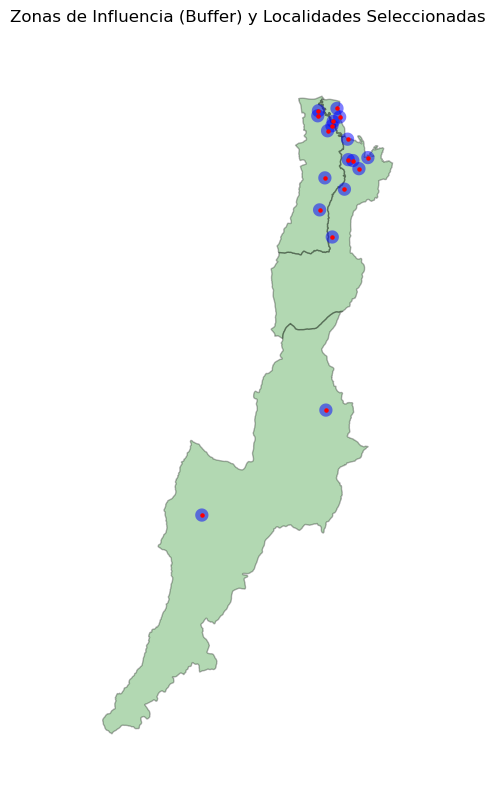

In [235]:
#5.2.2 Areas de influencia , ahora se expondra a partir de un buffer la influencia que pueden tener las unidades de salud
# Cargar las localidades
localidades_path = r"C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Localidades\Loca.shp"
localidades_gdf = gpd.read_file(localidades_path)

# Filtrar las localidades de la Subred Sur
localidades_deseadas = ["TUNJUELITO", "SUMAPAZ", "CIUDAD BOLIVAR", "USME"]
localidades_filtradas = localidades_gdf[localidades_gdf['LocNombre'].isin(localidades_deseadas)]

# Cargar el CSV de unidades de salud
csv_path = r"C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD_modificado.csv"
unidades_de_salud = pd.read_csv(csv_path)

# Crear una columna de geometría para las unidades de salud
geometry = [Point(xy) for xy in zip(unidades_de_salud['X'], unidades_de_salud['Y'])]
unidades_de_salud_gdf = gpd.GeoDataFrame(unidades_de_salud, geometry=geometry)

# Asegurarse de que las unidades de salud tienen el CRS adecuado (4326)
unidades_de_salud_gdf = unidades_de_salud_gdf.set_crs('EPSG:4326')

# Crear buffer de 1 km alrededor de las unidades de salud
unidades_de_salud_gdf = unidades_de_salud_gdf.to_crs('EPSG:3395') 
buffer_unidades_salud = unidades_de_salud_gdf.buffer(1000)

# Volver a cambiar el CRS de las localidades a EPSG:3395 para que coincidan
localidades_filtradas = localidades_filtradas.to_crs('EPSG:3395')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear las localidades filtradas
localidades_filtradas.plot(ax=ax, color='green', edgecolor='black', alpha=0.3, label='Localidades')

# Plotear los buffers de las unidades de salud
buffer_unidades_salud.plot(ax=ax, color='blue', alpha=0.5, label='Buffer de unidades de salud')

# Plotear las unidades de salud originales
unidades_de_salud_gdf.plot(ax=ax, color='red', markersize=5, label='Unidades de salud')

# Eliminar los ejes X e Y
ax.set_axis_off()

# Añadir título
plt.title("Zonas de Influencia (Buffer) y Localidades Seleccionadas")

# Ajustar límites para asegurar que todo sea visible (usar el bounding box de las localidades filtradas)
minx, miny, maxx, maxy = localidades_filtradas.total_bounds
ax.set_xlim(minx - 10000, maxx + 10000)  # Ajuste de margen
ax.set_ylim(miny - 10000, maxy + 10000)  # Ajuste de margen

# Mostrar el gráfico
plt.show()






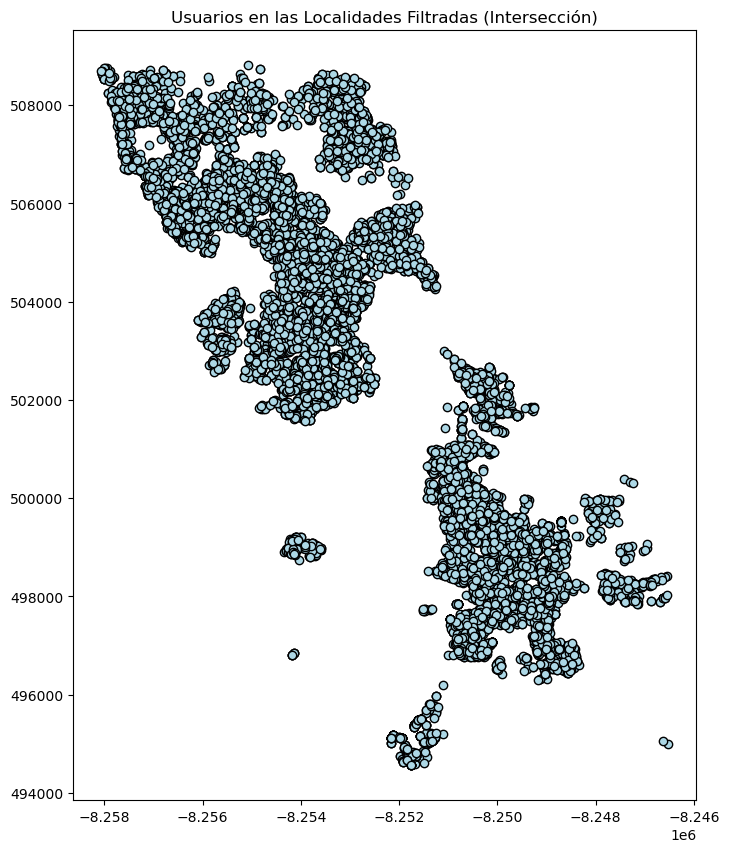

In [247]:
# 5.2.3 Overlay , se mostrará qué usuarios se encuentran dentro de las localidades de la Subred Sur (como Tunjuelito, Sumapaz, Usme, Ciudad Bolívar).
# Asegurarte de que ambas capas tengan el mismo CRS (por ejemplo, EPSG:3395)
Usuarios_contributivo = Usuarios_contributivo.to_crs(epsg=3395)
localidades_filtradas = localidades_filtradas.to_crs(epsg=3395)

# Realizar la intersección entre usuarios y localidades
interseccion_usuarios_localidades = gpd.overlay(Usuarios_contributivo, localidades_filtradas, how='intersection')

fig, ax = plt.subplots(figsize=(10, 10))
interseccion_usuarios_localidades.plot(ax=ax, color='lightblue', edgecolor='black')

# Añadir título
plt.title("Usuarios en las Localidades Filtradas (Intersección)")

# Ajustar el aspect ratio del gráfico
ax.set_aspect('equal')

# Mostrar el gráfico
plt.show()



In [285]:
#5.2.4 el spatial join se hizo en el punto 5.1
#5.2.5 Uniendo capas incongruentes 
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon

# Paso 1: Cargar los datos 
localidades_gdf = gpd.read_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Localidades\Loca.shp')  # Cargar el shapefile de localidades
usuarios_contributivo_df = pd.read_csv(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv')  # Cargar los datos de usuarios

# Paso 2: Filtrar las localidades de interés es decir las de la Subred Sur 
localidades_deseadas = ["TUNJUELITO", "SUMAPAZ", "CIUDAD BOLIVAR", "USME"]
localidades_filtradas = localidades_gdf[localidades_gdf['LocNombre'].isin(localidades_deseadas)]

# Paso 3: Crear una cuadrícula sintética (grid) sobre la extensión de las localidades
xmin, ymin, xmax, ymax = localidades_filtradas.total_bounds  # Extensión de las localidades
n_cols, n_rows = 10, 10  # Definir el número de celdas en la cuadrícula

# Crear las celdas de la cuadrícula
cell_width = (xmax - xmin) / n_cols
cell_height = (ymax - ymin) / n_rows

cells = []
for i in range(n_cols):
    for j in range(n_rows):
        cell = Polygon([
            (xmin + i * cell_width, ymin + j * cell_height),
            (xmin + (i + 1) * cell_width, ymin + j * cell_height),
            (xmin + (i + 1) * cell_width, ymin + (j + 1) * cell_height),
            (xmin + i * cell_width, ymin + (j + 1) * cell_height),
        ])
        cells.append(cell)

# Crear el GeoDataFrame de la cuadrícula
grid_gdf = gpd.GeoDataFrame({'geometry': cells}, crs=localidades_filtradas.crs)

# Reproyectar a un CRS proyectado para calcular áreas correctas (ejemplo: UTM)
grid_gdf = grid_gdf.to_crs(epsg=3395)  # Reproyectar a un sistema de coordenadas proyectadas (Mercator)

# Paso 4: Convertir los usuarios en un GeoDataFrame
# Asumir que las columnas 'X' y 'Y' contienen las coordenadas de los usuarios
usuarios_contributivo_gdf = gpd.GeoDataFrame(
    usuarios_contributivo_df, 
    geometry=gpd.points_from_xy(usuarios_contributivo_df['X'], usuarios_contributivo_df['Y']), 
    crs='EPSG:4326'
)

# Reproyectar los usuarios a la misma proyección de la cuadrícula
usuarios_contributivo_gdf = usuarios_contributivo_gdf.to_crs(epsg=3395)

# Paso 5: Realizar la unión espacial para contar los usuarios en cada celda
usuarios_en_celdas = gpd.sjoin(usuarios_contributivo_gdf, grid_gdf, how='right', predicate='within')

# Contar la cantidad de usuarios en cada celda
usuarios_por_celda = usuarios_en_celdas.groupby('index_left').size()  # 'index_right' es el índice de la celda
grid_gdf['usuarios'] = grid_gdf.index.map(usuarios_por_celda).fillna(0)

# Paso 6: Calcular el área de cada celda y ponderar la cantidad de usuarios por el área
grid_gdf['area'] = grid_gdf.geometry.area  # Calcular área en metros cuadrados

# Calcular la proporción de usuarios ponderada por el área
grid_gdf['usuarios_ponderados'] = grid_gdf['usuarios'] * grid_gdf['area']

# Paso 7: Mostrar resultados
print(f"Total de usuarios en el área original: {usuarios_contributivo_gdf.shape[0]}")
print(f"Total de usuarios distribuidos en la cuadrícula: {grid_gdf['usuarios'].sum()}")

# Ver el GeoDataFrame con los resultados
print(grid_gdf[['usuarios', 'area', 'usuarios_ponderados']].head())



Total de usuarios en el área original: 14141
Total de usuarios distribuidos en la cuadrícula: 80.0
   usuarios          area  usuarios_ponderados
0       1.0  4.220399e+07         4.220399e+07
1       1.0  4.220831e+07         4.220831e+07
2       0.0  4.221274e+07         0.000000e+00
3       1.0  4.221727e+07         4.221727e+07
4       1.0  4.222189e+07         4.222189e+07


## Preguntas sobre Operaciones espaciales 

1. ¿Qué son las capas incongruentes y en qué se diferencian de las capas congruentes en el análisis espacial?

Las capas incongruentes son aquellas que tienen un sistema de referencia diferente a otros datos y que generan problemas al realizar alguna interacción entre ellas mientras que las congruentes si tienen el mismo sistema de referencia

2. ¿Cuál es la importancia de abordar la incongruencia en las capas?

La importancia de abordar este tema es para evitar los errores y evitar distorsiones en el análisis espacial además mejora la precisión de las operaciones entre capas 

3. ¿Cómo ayuda la interpolación ponderada por área a resolver problemas causados por la incongruencia entre capas?

Al usar la interpolación ponderada por áreas sea ayuda a disminuir los problemas de incongruencia en las capas al distribuir como se vio en el último punto de esta parte del taller los atributos de manera proporcional en el área a trabajar  

4. ¿Cuáles son las limitaciones del uso de la interpolación ponderada por área con capas incongruentes?

La interpolación ponderada puede tener inconvenientes en la precisión, cuando el sistema de referencias no coincide o cuando el área a estudiar es demasiado pequeña y no coincide con los datos utilizados 









In [17]:
# 5.2.6 Relaciones topologicas 
#Para esta parte del taller se utilizará las relaciónes "Touches" y "Intersects"

import geopandas as gpd
import pandas as pd 
# Cargar los datos
localidades_gdf = gpd.read_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Localidades\Loca.shp')
usuarios_contributivo_df = pd.read_csv(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv')

#Convertir usuarios asignados en un GeoDataFrame
usuarios_contributivo_gdf = gpd.GeoDataFrame(
    usuarios_contributivo_df, 
    geometry=gpd.points_from_xy(usuarios_contributivo_df['X'], usuarios_contributivo_df['Y']), 
    crs='EPSG:4326'
)

# Reproyectar los usuarios y localidades al mismo CRS
localidades_gdf = localidades_gdf.to_crs(epsg=3395)
usuarios_contributivo_gdf = usuarios_contributivo_gdf.to_crs(epsg=3395)

# Encontrar usuarios que toquen la frontera de una localidad específica (por ejemplo, "Ciudad Bolívar")
localidad_objetivo = localidades_gdf[localidades_gdf['LocNombre'] == 'CIUDAD BOLIVAR']
usuarios_que_toquen = gpd.sjoin(usuarios_contributivo_gdf, localidad_objetivo, how='inner', predicate='touches')

#Mostrar el número de usuarios que tocan la frontera de Ciudad Bolívar
print(f"Usuarios que tocan la frontera de Ciudad Bolívar: {usuarios_que_toquen.shape[0]}")



Usuarios que tocan la frontera de Ciudad Bolívar: 0


In [35]:
import geopandas as gpd

# Paso 1: Cargar los datos
localidades_gdf = gpd.read_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Localidades\Loca.shp')

# Filtrar las localidades de interés (por ejemplo, Subred Sur)
localidades_deseadas = ["TUNJUELITO", "SUMAPAZ", "CIUDAD BOLIVAR", "USME"]
localidades_filtradas = localidades_gdf[localidades_gdf['LocNombre'].isin(localidades_deseadas)]

# Paso 2: Identificar las localidades que se intersectan con las localidades de interés
localidades_intersectadas = gpd.sjoin(localidades_filtradas, localidades_gdf, how="left", predicate='intersects')

print (localidades_intersectadas)





   LocNombre_left      LocAAdmini_left  LocArea_left LocCodigo_left  \
0      TUNJUELITO  Acuerdo 117 de 2003  9.910940e+06             06   
0      TUNJUELITO  Acuerdo 117 de 2003  9.910940e+06             06   
0      TUNJUELITO  Acuerdo 117 de 2003  9.910940e+06             06   
1         SUMAPAZ    Acuerdo 9 de 1986  7.809688e+08             20   
1         SUMAPAZ    Acuerdo 9 de 1986  7.809688e+08             20   
2            USME   Acuerdo 15 de 1993  2.150667e+08             05   
2            USME   Acuerdo 15 de 1993  2.150667e+08             05   
2            USME   Acuerdo 15 de 1993  2.150667e+08             05   
2            USME   Acuerdo 15 de 1993  2.150667e+08             05   
3  CIUDAD BOLIVAR   Acuerdo 14 de 1983  1.300026e+08             19   
3  CIUDAD BOLIVAR   Acuerdo 14 de 1983  1.300026e+08             19   
3  CIUDAD BOLIVAR   Acuerdo 14 de 1983  1.300026e+08             19   

   SHAPE_Leng_left  SHAPE_Area_left SUBRED_left  \
0         0.210542       

## Operaciones espaciales con archivos raster
En esta sección, se utilizara un raster resultante de la densidad poblacional de los usuarios asignados a la Subred Sur en la localidad de Tunjuelito , en un primer lugar se hace ese filtro para poder crear un raster y ubicar los usuarios que estan en la localidad , luego , se crea un raster con el mismo crs del filtro para asi hacer la suporposicion de densidad   

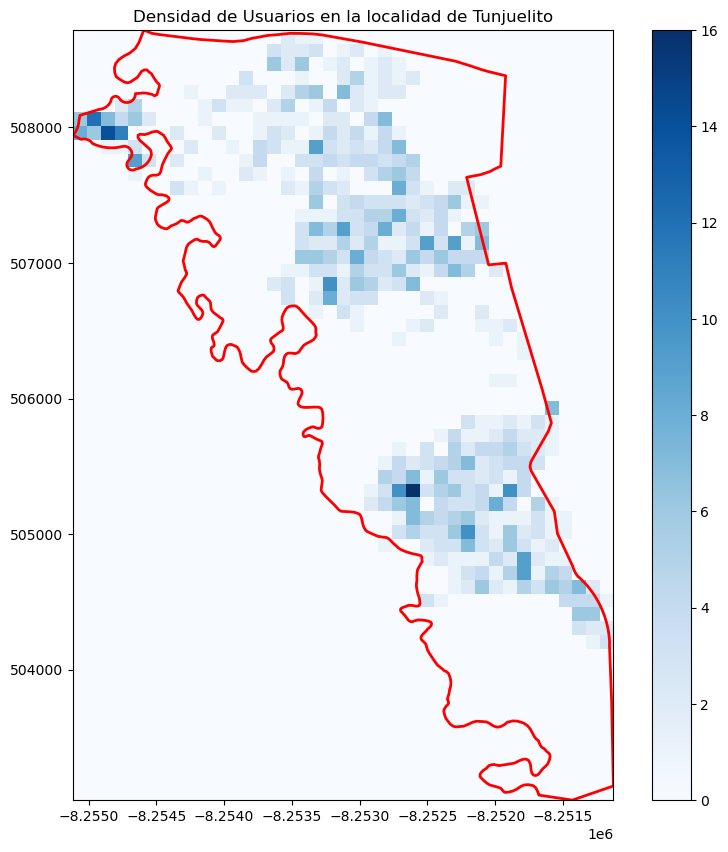

In [103]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

# Cargar los datos de los usuarios y localidades
usuarios_df = pd.read_csv(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Contributivo_Diciembre_Modificado.csv')
localidades_gdf = gpd.read_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\Localidades\Loca.shp')

# Convertir el DataFrame de usuarios a GeoDataFrame
usuarios_gdf = gpd.GeoDataFrame(usuarios_df, 
                                geometry=gpd.points_from_xy(usuarios_df['X'], usuarios_df['Y']), 
                                crs='EPSG:4326')  # CRS original del archivo CSV

# Filtrar la localidad Tunjuelito
localidad_tunjuelito = localidades_gdf[localidades_gdf['LocNombre'] == 'TUNJUELITO']

# Convertir ambos a CRS común (EPSG:3395 en este caso)
localidad_tunjuelito = localidad_tunjuelito.to_crs('EPSG:3395')
usuarios_gdf = usuarios_gdf.to_crs('EPSG:3395')

# Realizar el clip de los usuarios dentro de Tunjuelito
usuarios_clip = gpd.clip(usuarios_gdf, localidad_tunjuelito)

# Definir la resolución del raster
res = 100  # resolución del raster en metros

# Definir los límites de la extensión del raster
minx, miny, maxx, maxy = localidad_tunjuelito.total_bounds

# Transformación de coordenadas a píxeles
transform = from_origin(maxx, maxy, res, res)  # (x, y, pixel_width, pixel_height)

# Calcular el número de filas y columnas del raster
width = int((maxx - minx) / res)
height = int((maxy - miny) / res)

# Crear un raster vacío
raster = np.zeros((height, width), dtype=np.uint8)

# Rasterizar los puntos de los usuarios
for _, row in usuarios_clip.iterrows():
    # Obtener las coordenadas del punto
    x, y = row.geometry.x, row.geometry.y
    
    # Convertir las coordenadas en índices de la cuadrícula
    col = int((x - minx) / res)
    row_idx = int((maxy - y) / res)
    
    # Aumentar el valor en esa celda
    raster[row_idx, col] += 1

# Crear un archivo raster
raster_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\usuarios_tunjuelito_raster.tif'
with rasterio.open(
    raster_path, 'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=raster.dtype,
    crs=localidad_tunjuelito.crs,
    transform=transform
) as dst:
    dst.write(raster, 1)

# Visualizar el raster y el polígono de Tunjuelito
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el raster
cax = ax.imshow(raster, cmap='Blues', interpolation='nearest', extent=[minx, maxx, miny, maxy])

# Superponer el polígono de Tunjuelito
localidad_tunjuelito.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Añadir una barra de color
fig.colorbar(cax, ax=ax, orientation='vertical')

# Títulos y leyenda
ax.set_title('Densidad de Usuarios en la localidad de Tunjuelito')
plt.show()









## Preguntas
¿Qué desafíos podrían surgir al calcular estadísticas zonales para polígonos irregulares o muy pequeños?

Como sucedio en este caso , el problema radica en la resolucion del pixel , los limites no son claros , las cuadriculas no quedan alineadas por lo tanto se debe prestar atención tanto en el tamaño del raster y sus celdas como el de los poligonos a tratar 

## Creación de índices y operación entre rasters

Con los datos trabajados en este taller, se haran tres raster , un raster de accesibilidad para responder al taller, un raster de la distancia a los centros de salud y el ultimo, un indice derivado entre los rasters hechos para medir la accesibilidad según estos productos a la salud en el territorio dado

In [143]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.spatial.distance import cdist

# Cargar los datos de unidades de salud
unidades_salud_df = pd.read_csv(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\UNIDADES_SALUD_modificado.csv')
unidades_salud_gdf = gpd.GeoDataFrame(unidades_salud_df, 
                                      geometry=gpd.points_from_xy(unidades_salud_df['X'], unidades_salud_df['Y']), 
                                      crs='EPSG:4326')

# Convertir a CRS adecuado
unidades_salud_gdf = unidades_salud_gdf.to_crs('EPSG:3395')

# Filtrar la localidad Tunjuelito
localidad_tunjuelito = localidades_gdf[localidades_gdf['LocNombre'] == 'TUNJUELITO']
localidad_tunjuelito = localidad_tunjuelito.to_crs('EPSG:3395')

# Definir resolución del raster
res = 100  # resolución en metros
minx, miny, maxx, maxy = localidad_tunjuelito.total_bounds
transform = from_origin(maxx, maxy, res, res)

# Calcular tamaño del raster
width = int((maxx - minx) / res)
height = int((maxy - miny) / res)
raster_distancia = np.zeros((height, width), dtype=np.float32)

# Crear una matriz de distancias entre cada celda y las unidades de salud
coords_unidades = np.array([list(geom.coords)[0] for geom in unidades_salud_gdf.geometry])

# Iterar sobre cada celda del raster
for row in range(height):
    for col in range(width):
        # Convertir las coordenadas del raster a coordenadas reales
        x = minx + col * res
        y = maxy - row * res
        dist = cdist([[x, y]], coords_unidades, metric='euclidean')
        raster_distancia[row, col] = np.min(dist)  # Tomamos la distancia mínima

# Crear y guardar el archivo raster de distancia
raster_distancia_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\distancia_centros_salud.tif'
with rasterio.open(
    raster_distancia_path, 'w', 
    driver='GTiff', height=height, width=width, count=1, dtype=raster_distancia.dtype,
    crs=localidad_tunjuelito.crs, transform=transform
) as dst:
    dst.write(raster_distancia, 1)

print(f"Raster de distancia a centros de salud guardado en: {raster_distancia_path}")


Raster de distancia a centros de salud guardado en: C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\distancia_centros_salud.tif


In [145]:
# Cargar el raster de densidad de usuarios 
with rasterio.open(raster_path) as src:
    raster_densidad = src.read(1)  # Leer los datos del raster de densidad

# Coincidencia entre distancia y densidad
if raster_densidad.shape != raster_distancia.shape:
    print("Las dimensiones de los rasters no coinciden. Ajustando el tamaño...")
    
else:
    # Normalizar los valores de distancia (invertir para que la menor distancia tenga el mayor valor)
    raster_distancia_normalizada = np.max(raster_distancia) - raster_distancia

    # Combinar las dos capas 
    accesibilidad_raster = raster_densidad * raster_distancia_normalizada

    # Guardar el raster de accesibilidad
    accesibilidad_raster_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\accesibilidad_salud.tif'
    with rasterio.open(
        accesibilidad_raster_path, 'w', 
        driver='GTiff', height=height, width=width, count=1, dtype=accesibilidad_raster.dtype,
        crs=localidad_tunjuelito.crs, transform=transform
    ) as dst:
        dst.write(accesibilidad_raster, 1)

    print(f"Raster de accesibilidad a servicios de salud guardado en: {accesibilidad_raster_path}")


Raster de accesibilidad a servicios de salud guardado en: C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\accesibilidad_salud.tif


In [147]:
import rasterio
import numpy as np

# Ruta de los rasters
distancia_raster_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\distancia_centros_salud.tif'
accesibilidad_raster_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\accesibilidad_salud.tif'

# Cargar los rasters de distancia y accesibilidad
with rasterio.open(distancia_raster_path) as src_distancia:
    distancia_data = src_distancia.read(1)
    transform_distancia = src_distancia.transform
    crs_distancia = src_distancia.crs

with rasterio.open(accesibilidad_raster_path) as src_accesibilidad:
    accesibilidad_data = src_accesibilidad.read(1)
    transform_accesibilidad = src_accesibilidad.transform
    crs_accesibilidad = src_accesibilidad.crs

# Normalizar los datos de accesibilidad 
accesibilidad_norm = accesibilidad_data / np.max(accesibilidad_data)

# Para la distancia, utilizamos la inversa para dar mayor peso a las distancias menores
distancia_norm = 1 / (distancia_data + 1e-5)  

# Calcular el índice combinando los dos rasters
indice_accesibilidad = distancia_norm * accesibilidad_norm

# Guardar el nuevo raster del índice
indice_raster_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\indice_accesibilidad.tif'

with rasterio.open(
    indice_raster_path, 'w',
    driver='GTiff',
    height=distancia_data.shape[0],
    width=distancia_data.shape[1],
    count=1,
    dtype=indice_accesibilidad.dtype,
    crs=crs_distancia,
    transform=transform_distancia
) as dst:
    dst.write(indice_accesibilidad, 1)

print(f"Índice de accesibilidad guardado en: {indice_raster_path}")


Índice de accesibilidad guardado en: C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\indice_accesibilidad.tif


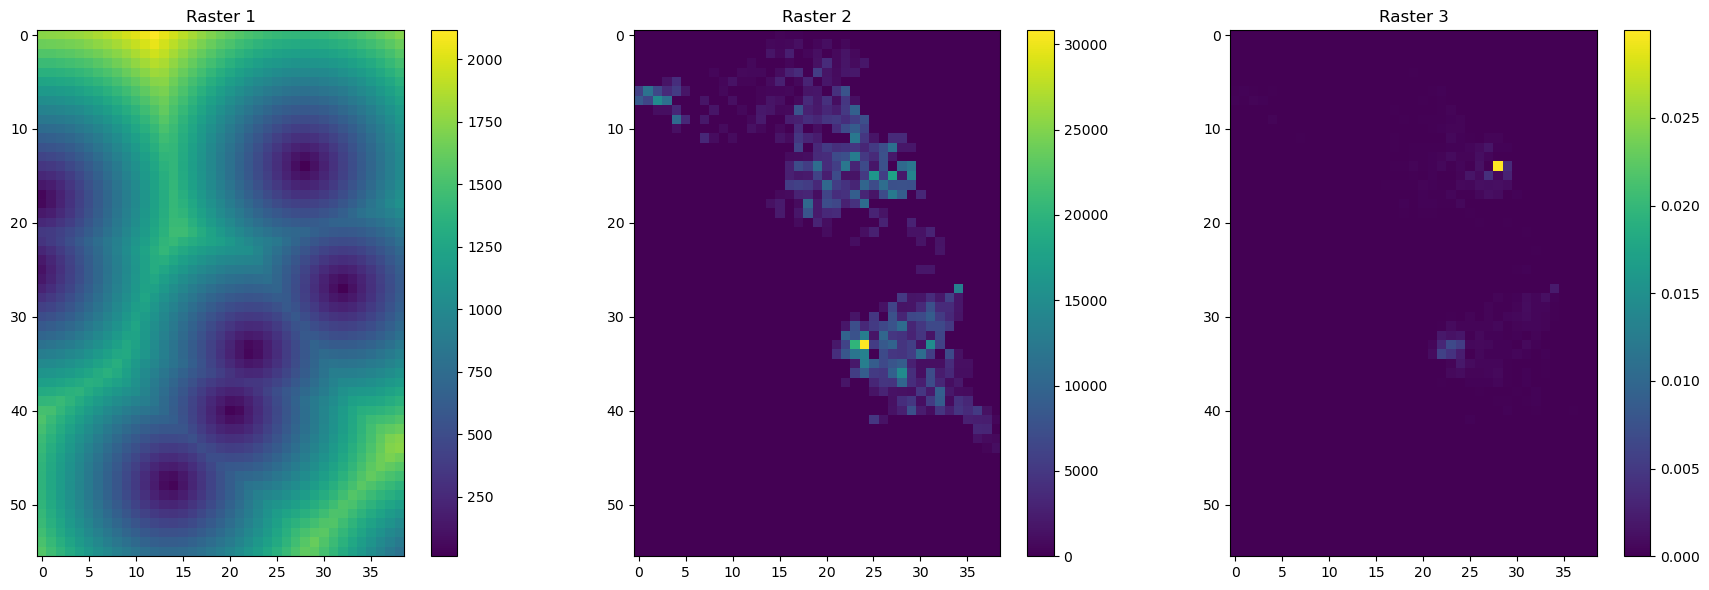

In [153]:
import rasterio
import matplotlib.pyplot as plt

# Rutas de los rasters generados
raster_paths = [
    r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\distancia_centros_salud.tif',
    r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\accesibilidad_salud.tif',
    r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\indice_accesibilidad.tif'
]

# Visualizar los rasters
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, raster_path in enumerate(raster_paths):
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Leer el primer canal
        ax = axes[i]
        cax = ax.imshow(raster_data, cmap='viridis', interpolation='nearest')
        ax.set_title(f'Raster {i+1}')
        fig.colorbar(cax, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()


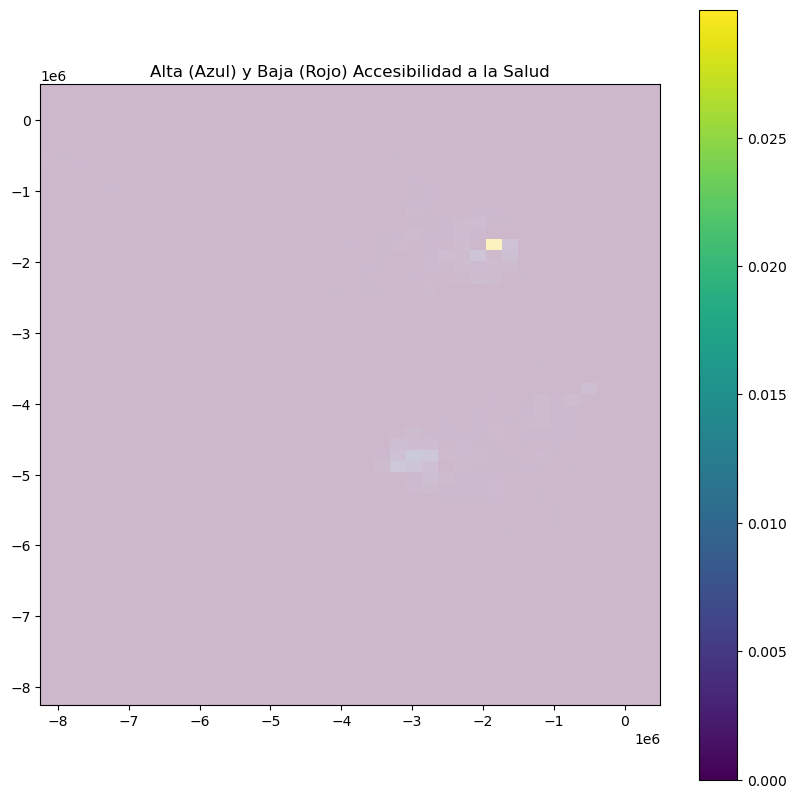

Área de alta accesibilidad: 0.00 m²
Área de baja accesibilidad: 21840000.00 m²


In [151]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Cargar el raster del índice de accesibilidad
raster_path = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\indice_accesibilidad.tif'
with rasterio.open(raster_path) as src:
    # Leer el raster
    indice_accesibilidad = src.read(1)
    transform = src.transform
    crs = src.crs

# Definir los umbrales de accesibilidad
umbral_alta = 0.7  # Alta accesibilidad
umbral_baja = 0.3  # Baja accesibilidad

# Crear máscaras de alta y baja accesibilidad
mask_alta = indice_accesibilidad >= umbral_alta
mask_baja = indice_accesibilidad <= umbral_baja

# Calcular áreas de cobertura (en metros cuadrados)
pixel_area = src.res[0] * src.res[1]  # Área de un píxel en metros cuadrados

area_alta_accesibilidad = np.sum(mask_alta) * pixel_area  # m²
area_baja_accesibilidad = np.sum(mask_baja) * pixel_area  # m²

# Visualizar las áreas con alta y baja accesibilidad
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el índice de accesibilidad con las máscaras de alta y baja
cax = ax.imshow(indice_accesibilidad, cmap='viridis', extent=src.bounds)
ax.imshow(mask_alta, cmap='Blues', alpha=0.5, extent=src.bounds)
ax.imshow(mask_baja, cmap='Reds', alpha=0.5, extent=src.bounds)

# Añadir la barra de color y título
fig.colorbar(cax, ax=ax, orientation='vertical')
ax.set_title('Alta (Azul) y Baja (Rojo) Accesibilidad a la Salud')

plt.show()

# Mostrar áreas de cobertura
print(f"Área de alta accesibilidad: {area_alta_accesibilidad:.2f} m²")
print(f"Área de baja accesibilidad: {area_baja_accesibilidad:.2f} m²")


## Preguntas finales 
1. ¿Cómo afecta el remuestreo a la precisión y utilidad de su análisis?

El remuestreo puede afectar la composicion de los datos y la resolucion en este caso de los rasters generados  

2. ¿Cómo afectan las elecciones de preprocesamiento (por ejemplo, recorte, reproyección, remuestreo) los resultados finales de su análisis?

El reproceso de operaciones en los raster afectan el analisis en los lugares focalizados , la resolucion de los datos y obviando cierta informacion 
